In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(59537, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & ((lsl_dr.autism==1)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(63, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      214
Female     67
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       193
Black        37
Other        33
Asian         8
Missing       6
Hispanic      4
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    216
<36 weeks      65
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1           83
2          112
3           55
4+           9
Missing     22
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    126
Unknown                     63
Some college                54
Some high school            38
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Bachelor's degree          80
Unknown                    72
Post graduate degree       61
Some college               45
High school diploma/GED    23
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Ideal Participation      115
Average Participation     72
Missing                   49
Good Participation        37
Below Average              8
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,132.000000,127.000000,174.000000,278.000000
mean,16.159091,20.141732,25.448276,47.118705
std,18.793303,19.239396,20.429073,27.055437
min,0.000000,1.000000,1.000000,1.000000
25%,1.750000,3.000000,7.000000,30.000000
50%,10.000000,19.000000,24.000000,46.000000
75%,21.500000,28.000000,36.000000,65.000000
max,83.000000,83.000000,83.000000,141.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION + outside    108
OPTION only          79
Missing               3
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

85

In [17]:
autism_subset.degree_hl_as.isnull().sum()

85

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    73
0.0    64
3.0    23
5.0    14
4.0    13
1.0     6
2.0     3
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

0.0    73
6.0    66
3.0    20
5.0    19
2.0    16
4.0     2
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    232
1.0     12
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

37

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0735-2011-0006', '0735-2011-0006', '0735-2011-0006',
       '0735-2011-0006', '0735-2011-0006', '0411-2013-0004',
       '0411-2013-0004', '0411-2013-0004', '0411-2012-0035',
       '0411-2012-0035', '0411-2012-0035', '0411-2013-0006',
       '0411-2013-0006', '0411-2013-0006', '0411-2012-0017',
       '0411-2012-0017', '0414-2017-0023', '0414-2017-0023',
       '0414-2017-0023', '0414-2017-0023', '0414-2017-0023',
       '0414-2017-0020', '0414-2017-0020', '0414-2017-0020',
       '0414-2017-0020', '0414-2017-0020', '0411-2014-0038',
       '0411-2014-0038', '0411-2014-0038', '0411-2012-0006',
       '0411-2012-0006', '0411-2012-0006', '0411-2010-0030',
       '0411-2010-0030', '0411-2010-0030', '0414-2013-0293',
       '0414-2013-0293', '0414-2013-0293', '0414-2013-0293',
       '0414-2013-0293', '0414-2013-0293', '0411-2010-0017',
       '0411-2010-0017',

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      119
bilateral_normal     64
unilateral_snhl       6
unilateral_mixed      3
assymetrical          2
bilateral_mixed       2
unilateral_unk        0
unilateral_cond       0
unilateral_ansd       0
bilateral_unk         0
bilateral_cond        0
bilateral_ansd        0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.42
bilateral_normal    0.23
unilateral_snhl     0.02
assymetrical        0.01
unilateral_mixed    0.01
bilateral_mixed     0.01
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_cond      0.00
bilateral_ansd      0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        181
bilateral_ha         18
unilateral_ci        14
bimodal               4
unilateral_other      0
unilateral_ha         0
bilateral_other       0
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.64
bilateral_ha        0.06
unilateral_ci       0.05
bimodal             0.01
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [29]:
tech_data[tech_data.sum(1)==0].index.values

array(['0414-2011-0180', '0414-2011-0180', '0414-2011-0180',
       '0414-2011-0180', '0414-2011-0178', '0414-2011-0178',
       '0414-2011-0178', '0414-2011-0178', '0414-2011-0178',
       '0414-2011-0178', '0414-2009-0056', '0414-2009-0056',
       '0414-2009-0056', '0414-2009-0056', '0414-2009-0056',
       '0414-2009-0056', '0414-2009-0079', '0414-2009-0079',
       '0414-2009-0079', '0414-2009-0079', '0414-2009-0079',
       '0414-2009-0079', '0414-2012-0228', '0414-2012-0228',
       '0414-2012-0228', '0414-2012-0228', '0414-2012-0228',
       '0414-2012-0228', '0414-2012-0229', '0414-2012-0229',
       '0414-2012-0229', '0414-2012-0229', '0414-2012-0229',
       '0414-2012-0229', '0414-2009-0041', '0414-2009-0041',
       '0414-2009-0041', '0414-2009-0041', '0414-2009-0041',
       '0414-2009-0041', '0414-2010-0055', '0414-2010-0055',
       '0414-2010-0055', '0414-2010-0055', '0414-2010-0055',
       '0414-2010-0055', '0414-2011-0154', '0414-2011-0154',
       '0414-2011-0154',

## Hearing Loss

In [30]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [31]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [32]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_normal       64
bilateral_hl_profound     63
bilateral_hl_severe       14
bilateral_hl_moderate     14
unilateral_hl_modsev       9
bilateral_hl_mild          3
unilateral_hl_profound     0
unilateral_hl_severe       0
unilateral_hl_moderate     0
unilateral_hl_mild         0
unilateral_hl_slight       0
bilateral_hl_modsev        0
bilateral_hl_slight        0
dtype: int64

In [33]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_normal       0.23
bilateral_hl_profound     0.22
bilateral_hl_severe       0.05
bilateral_hl_moderate     0.05
unilateral_hl_modsev      0.03
bilateral_hl_mild         0.01
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_modsev       0.00
bilateral_hl_slight       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [34]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

85

## Summary of scores by domain

In [35]:
test_scores = lsl_dr[inclusion_mask].copy()

In [36]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [37]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,33.0,78.9,22.0,39.0,59.0,83.0,97.0,110.0
Expressive Language,49.0,69.8,18.4,42.0,57.0,65.0,80.0,115.0
Expressive Vocabulary,50.0,82.1,20.7,20.0,71.0,80.5,98.0,125.0
Language,48.0,68.6,20.1,42.0,53.8,63.0,79.2,129.0
Receptive Language,49.0,71.7,20.1,46.0,57.0,69.0,79.0,140.0
Receptive Vocabulary,52.0,81.7,20.9,34.0,70.0,80.0,93.2,141.0


In [38]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [39]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

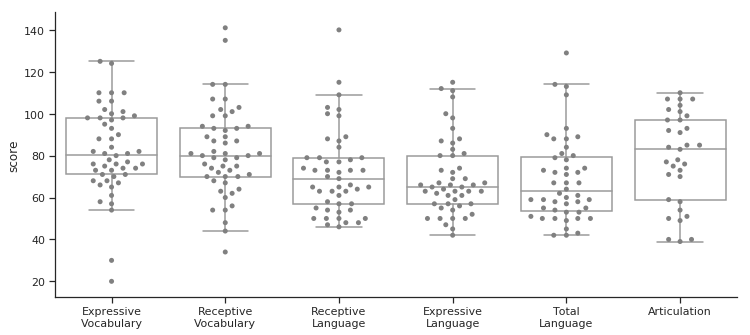

In [40]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
sns.swarmplot("domain_labels", y="score", data=test_scores, color='grey')
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [41]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                      
Articulation          False               27.0  78.481481  23.542711  39.0   
                      True                 6.0  80.833333  14.330620  58.0   
Expressive Language   False               33.0  72.393939  19.184856  42.0   
                      True                16.0  64.562500  15.953970  50.0   
Expressive Vocabulary False               37.0  83.594595  19.372746  30.0   
                      True                13.0  77.923077  24.339479  20.0   
Language              False               33.0  71.121212  21.190737  42.0   
                      True                15.0  62.933333  16.718111  45.0   
Receptive Language    False               33.0  74.303030  22.282960  47.0   
                      True                16.0  66.375000  13.559130  46.0   
Receptive Vocabulary  False               38.0  83.526316  21.022172  44.0   
                      True                14.0  76.642857  20.447333  34.0   

                                           25%   50%    75%    max  
domain                age_amp_greater_6                             
Articulation          False              56.50  83.0  98.00  110.0  
                      True               77.25  81.5  85.00  102.0  
Expressive Language   False              59.00  67.0  83.00  115.0  
                      True               54.25  63.0  66.75  112.0  
Expressive Vocabulary False              73.00  81.0  98.00  125.0  
                      True               70.00  80.0  95.00  110.0  
Language              False              55.00  72.0  84.00  129.0  
                      True               52.00  59.0  67.00  113.0  
Receptive Language    False              57.00  72.0  87.00  140.0  
                      True               56.25  65.0  74.00  100.0  
Receptive Vocabulary  False              71.25  80.5  93.75  141.0  
                      True               67.75  77.5  86.75  107.0

Age of enrollment greater than 6mo.

In [42]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_enroll_greater_6                                      
Articulation          False                  18.0  74.500000  20.382374  39.0   
                      True                   15.0  84.200000  23.348906  40.0   
Expressive Language   False                  23.0  71.000000  20.593468  42.0   
                      True                   26.0  68.807692  16.574726  47.0   
Expressive Vocabulary False                  31.0  80.870968  21.170328  30.0   
                      True                   19.0  84.157895  20.216229  20.0   
Language              False                  23.0  69.782609  23.455871  42.0   
                      True                   25.0  67.440000  16.837656  42.0   
Receptive Language    False                  23.0  71.565217  23.302021  48.0   
                      True                   26.0  71.846154  17.178341  46.0   
Receptive Vocabulary  False                  31.0  80.967742  22.829051  44.0   
                      True                   21.0  82.714286  18.163543  34.0   

                                              25%   50%    75%    max  
domain                age_enroll_greater_6                             
Articulation          False                 61.75  75.5   90.0  107.0  
                      True                  67.50  91.0  103.0  110.0  
Expressive Language   False                 57.00  66.0   80.5  115.0  
                      True                  59.50  65.0   78.0  112.0  
Expressive Vocabulary False                 68.00  76.0   98.0  125.0  
                      True                  77.00  88.0   98.0  110.0  
Language              False                 53.50  61.0   78.5  129.0  
                      True                  57.00  67.0   80.0  113.0  
Receptive Language    False                 54.00  66.0   76.0  140.0  
                      True                  61.50  70.5   79.0  115.0  
Receptive Vocabulary  False                 67.50  75.0   93.5  141.0  
                      True                  79.00  86.0   93.0  114.0

(Non-)Profound hearing loss

In [43]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count       mean        std   min    25%  \
domain                profound_hl                                             
Articulation          False         30.0  79.500000  22.349497  39.0  61.75   
                      True           3.0  73.000000  20.784610  49.0  67.00   
Expressive Language   False         32.0  67.718750  15.998456  45.0  56.75   
                      True          17.0  73.823529  22.232396  42.0  63.00   
Expressive Vocabulary False         39.0  82.692308  18.687392  30.0  72.00   
                      True          11.0  80.090909  27.569746  20.0  68.00   
Language              False         32.0  67.000000  16.615189  42.0  54.75   
                      True          16.0  71.687500  26.053071  42.0  53.00   
Receptive Language    False         32.0  71.562500  17.097326  47.0  57.75   
                      True          17.0  72.000000  25.322915  46.0  50.00   
Receptive Vocabulary  False         40.0  80.975000  17.512615  44.0  70.00   
                      True          12.0  84.000000  30.489939  34.0  69.25   

                                    50%    75%    max  
domain                profound_hl                      
Articulation          False        80.5  98.50  110.0  
                      True         85.0  85.00   85.0  
Expressive Language   False        64.0  80.00  112.0  
                      True         66.0  86.00  115.0  
Expressive Vocabulary False        81.0  98.00  125.0  
                      True         80.0  95.50  124.0  
Language              False        63.0  78.50  113.0  
                      True         63.5  81.50  129.0  
Receptive Language    False        68.0  80.25  115.0  
                      True         69.0  79.00  140.0  
Receptive Vocabulary  False        79.5  93.25  114.0  
                      True         81.0  90.50  141.0

Parent with(out) hearing loss

In [44]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                      
Articulation          False            31.0  78.064516  22.362074  39.0   
                      True              2.0  92.000000   9.899495  85.0   
Expressive Language   False            47.0  70.127660  18.741511  42.0   
                      True              2.0  63.000000   1.414214  62.0   
Expressive Vocabulary False            48.0  82.583333  20.870251  20.0   
                      True              2.0  71.000000  14.142136  61.0   
Language              False            46.0  69.043478  20.388403  42.0   
                      True              2.0  57.500000   3.535534  55.0   
Receptive Language    False            47.0  72.063830  20.414620  46.0   
                      True              2.0  63.500000   3.535534  61.0   
Receptive Vocabulary  False            50.0  82.300000  20.933568  34.0   
                      True              2.0  66.000000  16.970563  54.0   

                                        25%   50%    75%    max  
domain                parent_with_hl                             
Articulation          False           58.50  78.0  97.00  110.0  
                      True            88.50  92.0  95.50   99.0  
Expressive Language   False           57.00  66.0  80.50  115.0  
                      True            62.50  63.0  63.50   64.0  
Expressive Vocabulary False           71.00  80.5  98.00  125.0  
                      True            66.00  71.0  76.00   81.0  
Language              False           53.25  65.5  79.75  129.0  
                      True            56.25  57.5  58.75   60.0  
Receptive Language    False           56.00  70.0  79.00  140.0  
                      True            62.25  63.5  64.75   66.0  
Receptive Vocabulary  False           70.00  80.5  93.75  141.0  
                      True            60.00  66.0  72.00   78.0

Mother with(out) college education

In [45]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count       mean        std   min  \
domain                mother_college                                      
Articulation          0                12.0  79.083333  19.883563  49.0   
                      1                21.0  78.809524  23.574603  39.0   
Expressive Language   0                17.0  65.235294  17.977519  50.0   
                      1                32.0  72.281250  18.434250  42.0   
Expressive Vocabulary 0                20.0  80.400000  22.012915  30.0   
                      1                30.0  83.266667  20.020564  20.0   
Language              0                17.0  63.529412  20.344279  49.0   
                      1                31.0  71.322581  19.735564  42.0   
Receptive Language    0                17.0  66.705882  21.916788  48.0   
                      1                32.0  74.375000  18.824743  46.0   
Receptive Vocabulary  0                18.0  77.777778  23.890819  44.0   
                      1                34.0  83.735294  19.188552  34.0   

                                        25%   50%    75%    max  
domain                mother_college                             
Articulation          0               68.00  77.0  94.00  107.0  
                      1               58.00  84.0  99.00  110.0  
Expressive Language   0               55.00  57.0  66.00  115.0  
                      1               61.75  68.0  82.25  112.0  
Expressive Vocabulary 0               67.75  77.5  97.25  124.0  
                      1               74.00  81.0  98.00  125.0  
Language              0               51.00  58.0  62.00  129.0  
                      1               56.50  72.0  80.50  114.0  
Receptive Language    0               54.00  63.0  72.00  140.0  
                      1               62.50  73.0  84.75  115.0  
Receptive Vocabulary  0               62.25  77.5  91.25  141.0  
                      1               72.25  80.5  93.75  135.0